# Pairplots in Python

In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
# matplotlib for plotting
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

# Set text size
matplotlib.rcParams['font.size'] = 18

# Seaborn for pairplots
import seaborn as sns

sns.set_context('talk', font_scale=1.2);


## Gapminder Socioeconomic Data

In [2]:
df = pd.read_csv('data/gapminder_data.csv')
df.columns = ['country', 'continent', 'year', 'life_exp', 'pop', 'gdp_per_cap']
df.head()

,country,continent,year,life_exp,pop,gdp_per_cap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [3]:
df.describe()

,year,life_exp,pop,gdp_per_cap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165877
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846989
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


## Default Pair Plot with All Data

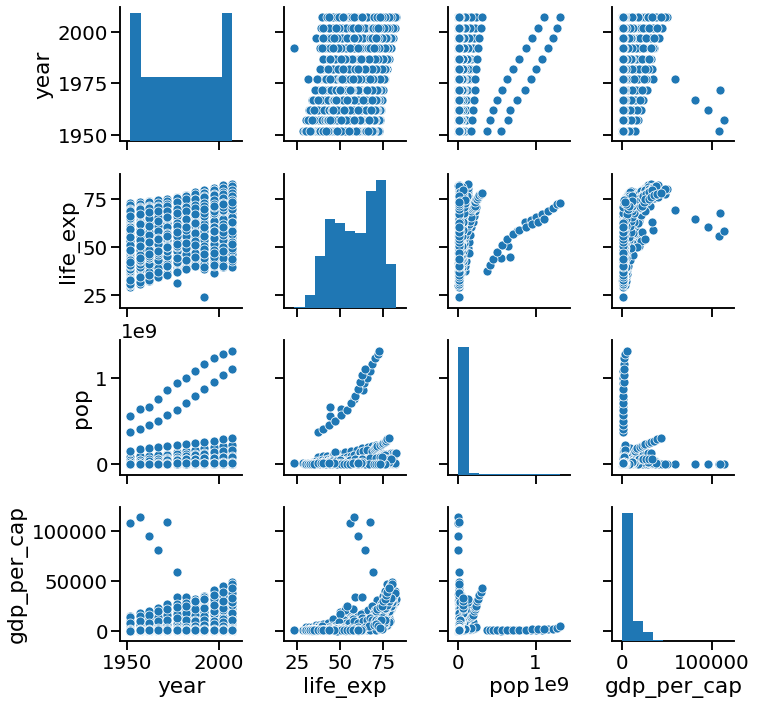

In [4]:
sns.pairplot(df);

In [5]:
df['log_pop'] = np.log10(df['pop'])
df['log_gdp_per_cap'] = np.log10(df['gdp_per_cap'])

df = df.drop(columns = ['pop', 'gdp_per_cap'])

## Group and Color by a Variable

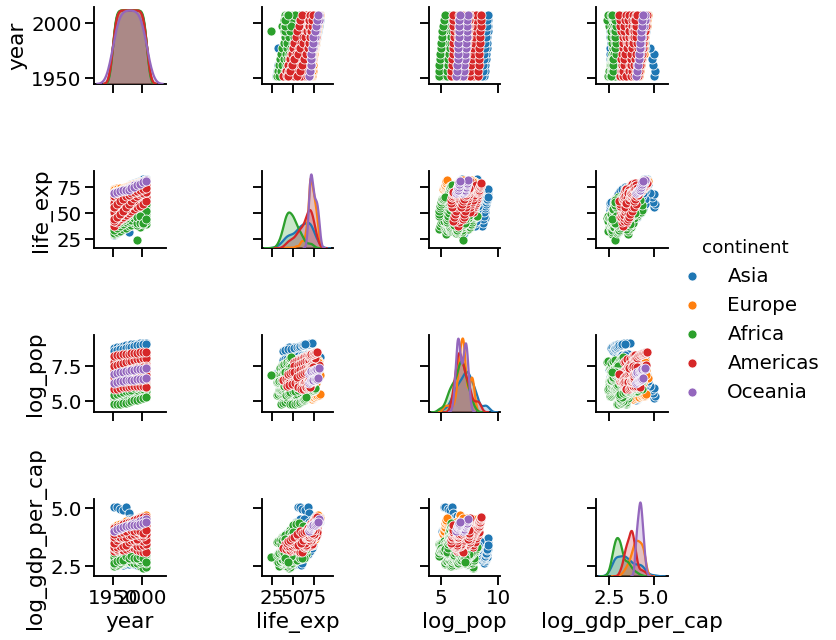

In [6]:
matplotlib.rcParams['font.size'] = 40
sns.pairplot(df, hue = 'continent');

## Customizing pairplot

C:\Users\igaraybeng001\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


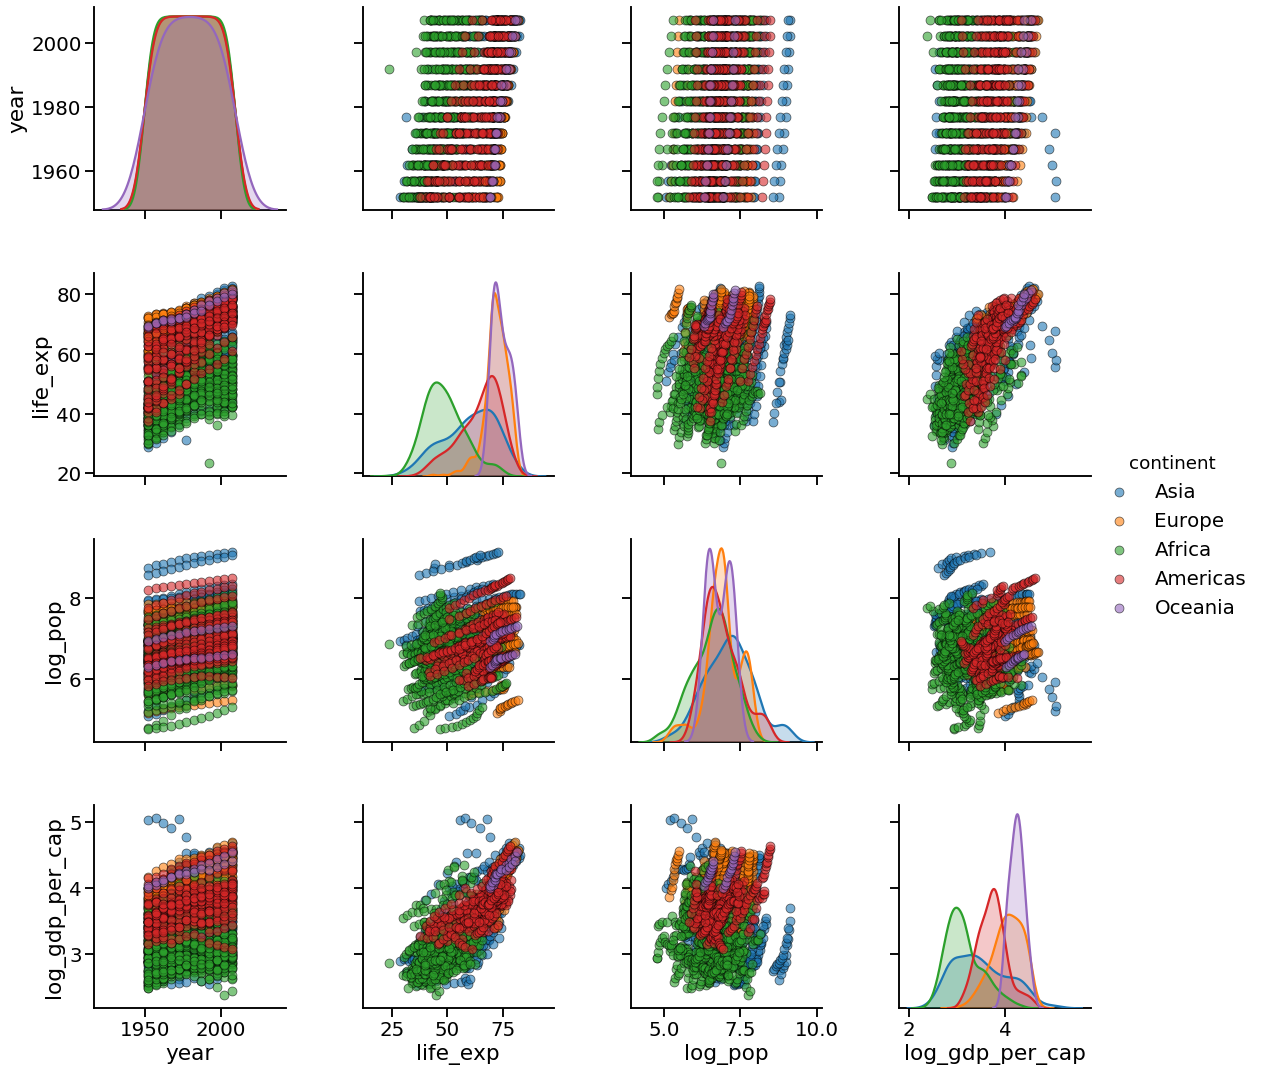

In [7]:
sns.pairplot(df, hue = 'continent', diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, size = 4);

In [8]:
df['decade'] = pd.cut(df['year'], bins = range(1950, 2010, 10))
df.head()

,country,continent,year,life_exp,log_pop,log_gdp_per_cap,decade
0,Afghanistan,Asia,1952,28.801,6.925587,2.891786,"(1950, 1960]"
1,Afghanistan,Asia,1957,30.332,6.965716,2.914265,"(1950, 1960]"
2,Afghanistan,Asia,1962,31.997,7.011447,2.931000,"(1960, 1970]"
3,Afghanistan,Asia,1967,34.020,7.062129,2.922309,"(1960, 1970]"
4,Afghanistan,Asia,1972,36.088,7.116590,2.869221,"(1970, 1980]"


C:\Users\igaraybeng001\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


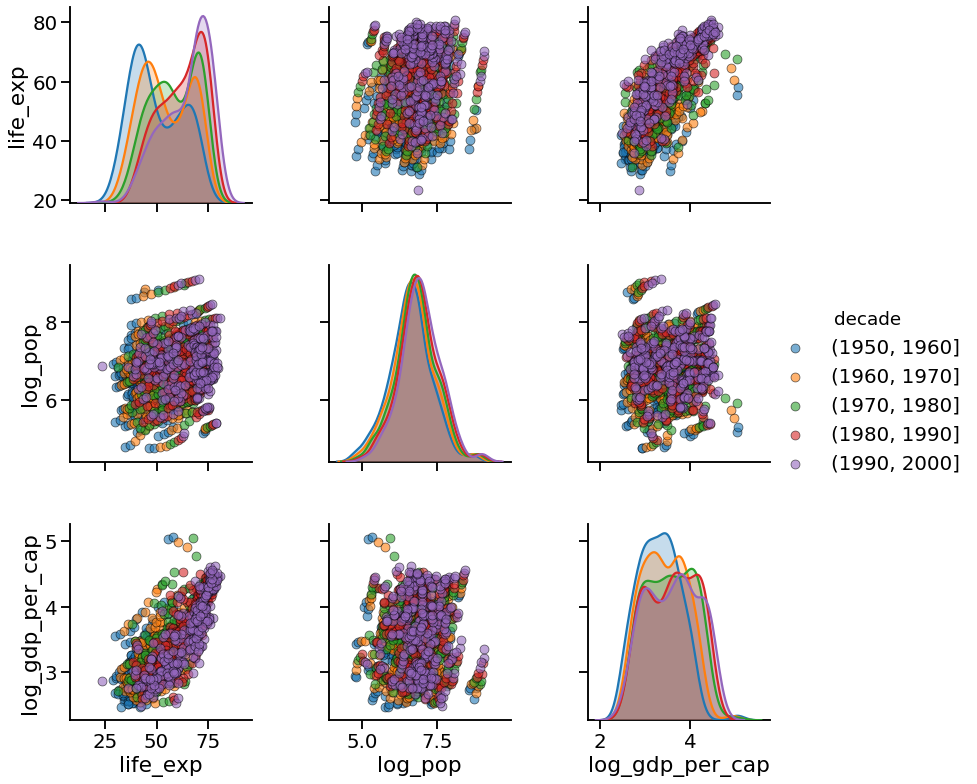

In [9]:
sns.pairplot(df, hue = 'decade', diag_kind = 'kde', vars = ['life_exp', 'log_pop', 'log_gdp_per_cap'],
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, size = 4);

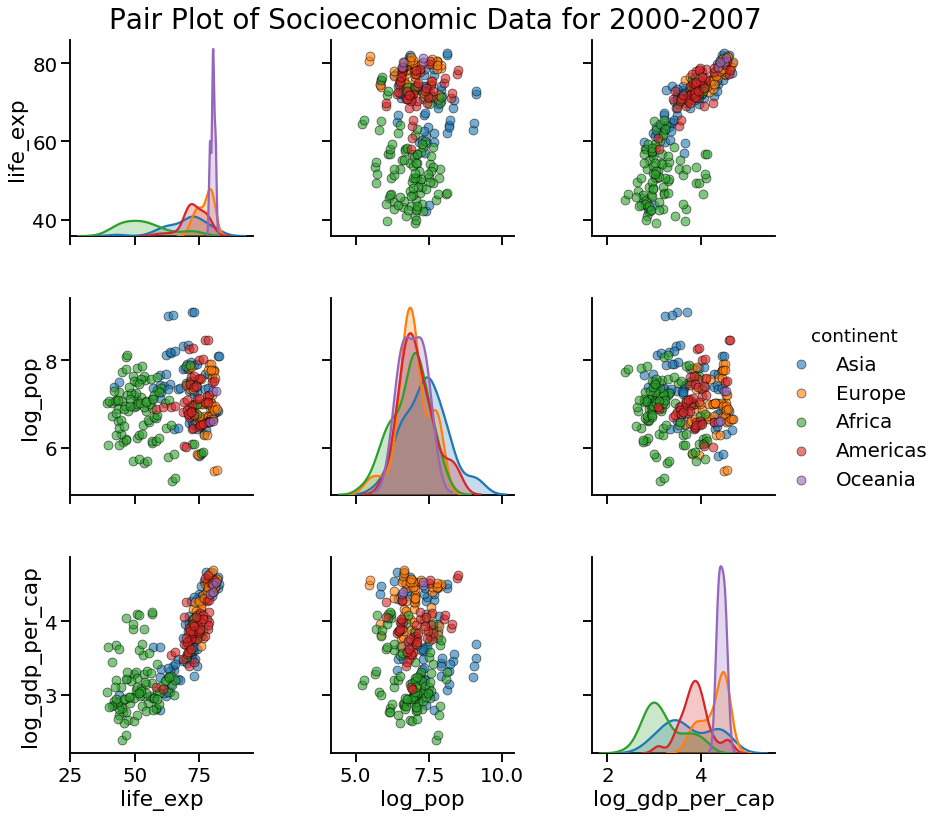

In [10]:
sns.pairplot(df[df['year'] >= 2000], vars = ['life_exp', 'log_pop', 'log_gdp_per_cap'], 
             hue = 'continent', diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, size = 4);
plt.suptitle('Pair Plot of Socioeconomic Data for 2000-2007', size = 28);

## More Customization with sns.PairGrid

C:\Users\igaraybeng001\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


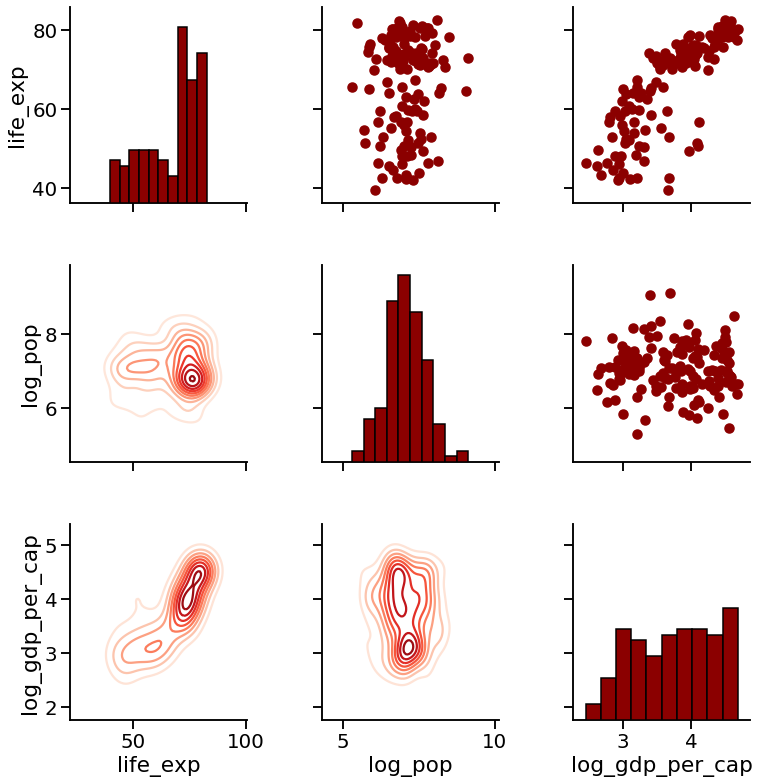

In [11]:
# Create an instance of the PairGrid class.
grid = sns.PairGrid(data= df[df['year'] == 2007],
                    vars = ['life_exp', 'log_pop', 'log_gdp_per_cap'], size = 4)

# Map different plots to different sections
grid = grid.map_upper(plt.scatter, color = 'darkred')
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
grid = grid.map_diag(plt.hist, bins = 10, color = 'darkred', edgecolor = 'k');

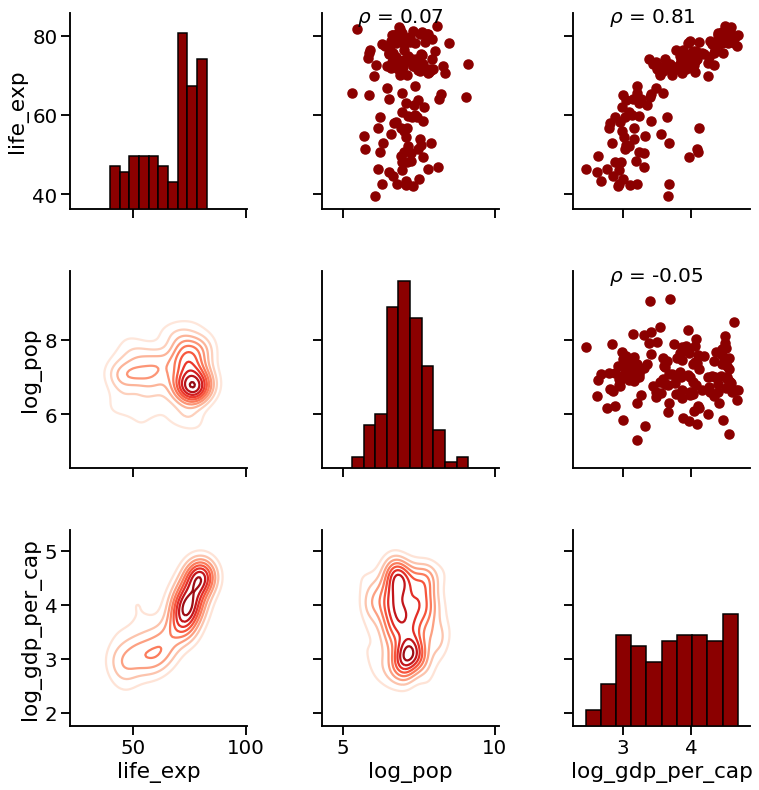

In [12]:
# Function to calculate correlation coefficient between two arrays
def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 20, xycoords = ax.transAxes)
    
# Create a pair grid instance
grid = sns.PairGrid(data= df[df['year'] == 2007],
                    vars = ['life_exp', 'log_pop', 'log_gdp_per_cap'], size = 4)

# Map the plots to the locations
grid = grid.map_upper(plt.scatter, color = 'darkred')
grid = grid.map_upper(corr)
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
grid = grid.map_diag(plt.hist, bins = 10, edgecolor =  'k', color = 'darkred');

C:\Users\igaraybeng001\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

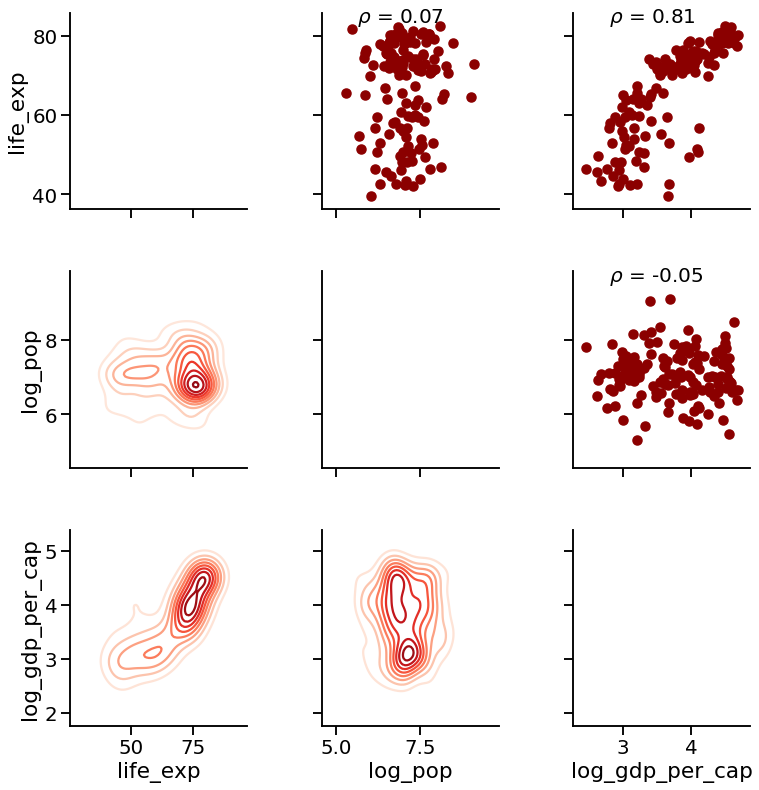

In [13]:
# Define a summary function
def summary(x, **kwargs):
    # Convert to a pandas series
    x = pd.Series(x)
    
    # Get stats for the series
    label = x.describe()[['mean', 'std', 'min', '50%', 'max']]
    
    # Convert from log to regular scale
    # Adjust the column names for presentation
    if label.name == 'log_pop':
        label = 10 ** label
        label.name = 'pop stats'
    elif label.name == 'log_gdp_per_cap':
        label = 10 ** label
        label.name = 'gdp_per_cap stats'
    else:
        label.name = 'life_exp stats'
       
    # Round the labels for presentation
    label = label.round()
    ax = plt.gca()
    ax.set_axis_off()

    # Add the labels to the plot
    ax.annotate(pd.DataFrame(label),
               xy = (0.1, 0.2), size = 20, xycoords = ax.transAxes)    
    

# Create a pair grid instance
grid = sns.PairGrid(data= df[df['year'] == 2007],
                    vars = ['life_exp', 'log_pop', 'log_gdp_per_cap'], size = 4)

# Fill in the mappings
grid = grid.map_upper(plt.scatter, color = 'darkred')
grid = grid.map_upper(corr)
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
grid = grid.map_diag(summary);